# Классификация рукописных цифр с помощью сверточной нейронной сети в pytorch

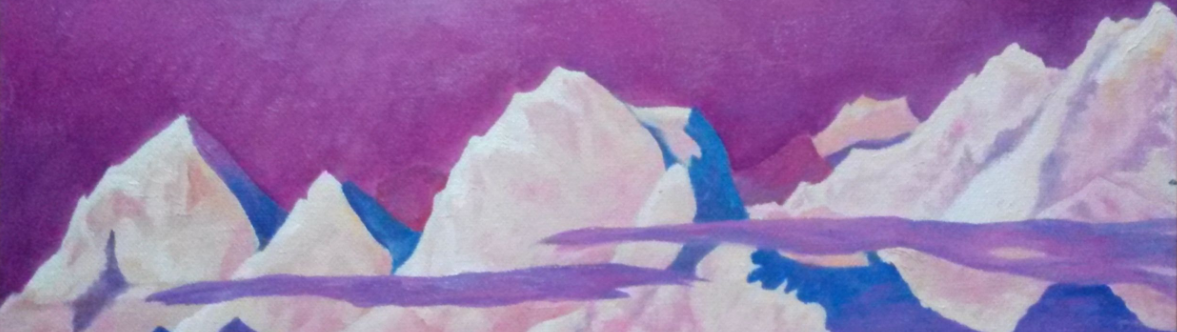

In [21]:
import numpy as np
import random

import torch


In [ ]:
import torchvision.datasets

In [ ]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:01<00:00, 5313773.94it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 477886.77it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 4400244.95it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 4042981.49it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels

X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
len(y_train), len(y_test)

(60000, 10000)

tensor(3)

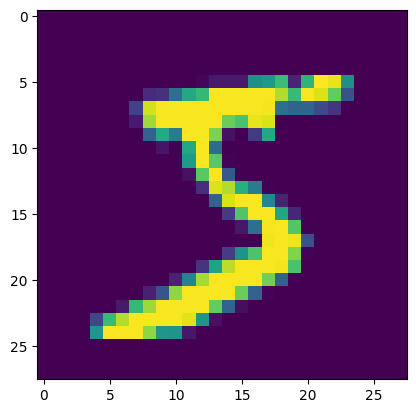

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
y_train[10]

In [ ]:
X_train.shape

torch.Size([60000, 28, 28])

In [ ]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [ ]:
X_train.shape, X_test.shape

(torch.Size([60000, 1, 28, 28]), torch.Size([10000, 1, 28, 28]))

 🎯  **Задание**:

<p> спроектировать сверточную нейронную сеть используя архитектуру LeNet (показана ниже)

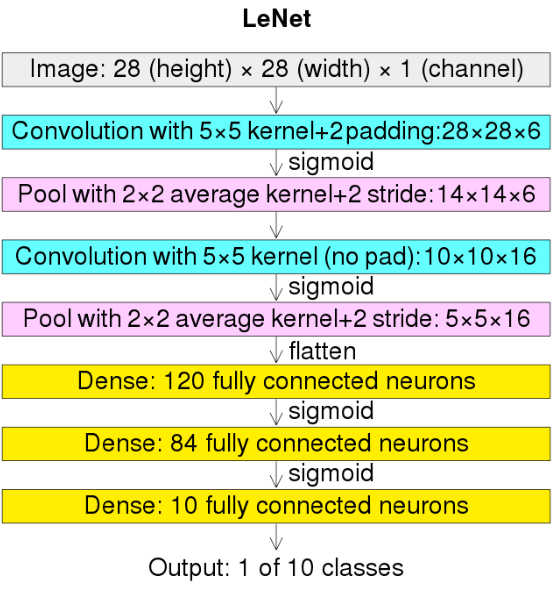

## 1 вариант написания класса нейронной сети LeNet

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


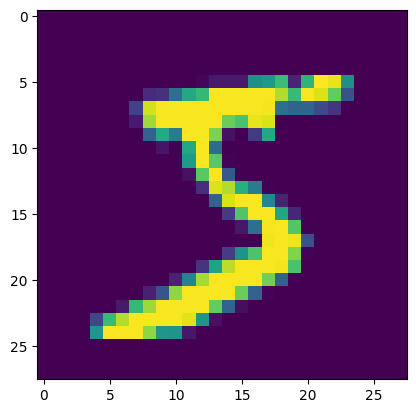

In [ ]:
import numpy as np
import random

import torch
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels

X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

len(y_train), len(y_test)

import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
y_train[10]
X_train.shape
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

X_train.shape, X_test.shape

class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels= 6 , kernel_size=5, padding=2)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.ReLU()

        self.fc2   = torch.nn.Linear(120,84)
        self.act4  = torch.nn.ReLU()

        self.fc3   = torch.nn.Linear(84,10)

    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

cnn = LeNet5()

## 2 вариант написания класса нейронной сети LeNet

In [ ]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.part1 = torch.nn.Sequential(
          torch.nn.Conv2d(in_channels=1, out_channels= 6 , kernel_size=5, padding=2),
          torch.nn.Sigmoid(),
          torch.nn.AvgPool2d(kernel_size=2, stride=2),

          torch.nn.Conv2d(in_channels=6, out_channels= 16 , kernel_size=5, padding=0),
          torch.nn.Sigmoid(),
          torch.nn.AvgPool2d(kernel_size=2, stride=2),
        )

        self.part2=torch.nn.Sequential(
          torch.nn.Linear(5 * 5 * 16, 120),
          torch.nn.Sigmoid(),

          torch.nn.Linear(120, 84),
          torch.nn.Sigmoid(),

          torch.nn.Linear(84, 10),
        )


    def forward(self, x):

        x=self.part1(x)
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x=self.part2(x)
        return x

cnn = LeNet5()

## Обучение нейронной сети:

In [ ]:


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # определяет устройство, на котором будет выполняться обучение модели
cnn.to(device) # перемещает модель cnn на выбранное устройство device
batch_size = 100 # сколько образцов данных обрабатываются одновременно в процессе обучения
loss = torch.nn.CrossEntropyLoss() # функция потерь
optimizer = torch.optim.Adam(cnn.parameters(), lr=1.0e-3) # оптимизатор для минимизации функции потерь

In [ ]:
test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(30):
    order = np.random.permutation(len(X_train))
    cnn.train()
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = cnn.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    cnn.eval()
    test_preds = cnn.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(f'Epoch: {epoch}, accuracy: {accuracy}, Loss: {loss(test_preds, y_test).data}')

Epoch: 0, accuracy: 0.9733999967575073, Loss: 0.08052085340023041
Epoch: 1, accuracy: 0.9881999492645264, Loss: 0.03444362059235573
Epoch: 2, accuracy: 0.98499995470047, Loss: 0.046158112585544586
Epoch: 3, accuracy: 0.9853999614715576, Loss: 0.045886196196079254
Epoch: 4, accuracy: 0.988599956035614, Loss: 0.035365939140319824
Epoch: 5, accuracy: 0.9878999590873718, Loss: 0.03817794471979141
Epoch: 6, accuracy: 0.9898999929428101, Loss: 0.035111844539642334
Epoch: 7, accuracy: 0.9901999831199646, Loss: 0.03131452202796936
Epoch: 8, accuracy: 0.9914999604225159, Loss: 0.02970554493367672
Epoch: 9, accuracy: 0.9896000027656555, Loss: 0.03439772129058838
Epoch: 10, accuracy: 0.9894999861717224, Loss: 0.03899584338068962
Epoch: 11, accuracy: 0.9892999529838562, Loss: 0.03967394307255745
Epoch: 12, accuracy: 0.9865999817848206, Loss: 0.048307232558727264
Epoch: 13, accuracy: 0.9899999499320984, Loss: 0.04268467426300049
Epoch: 14, accuracy: 0.9917999505996704, Loss: 0.03538411855697632
Epo

# Тестирование на одной цифре:

<ipython-input-19-1e0d41fbc84d>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  np.argmax(torch.nn.functional.softmax(Y).data.cpu()[0])


tensor(7, device='cuda:0')

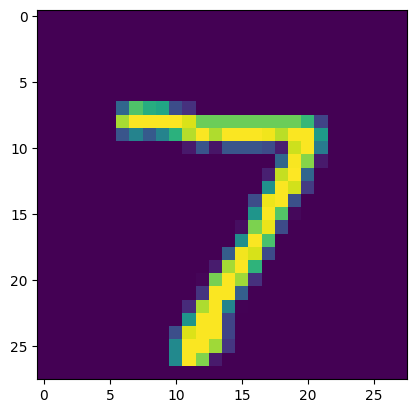

In [ ]:
Y=cnn.forward(X_test[0:1,:,:,:])
np.argmax(torch.nn.functional.softmax(Y).data.cpu()[0])

plt.imshow(X_test[0,0,:,:].data.cpu())
y_test[0]


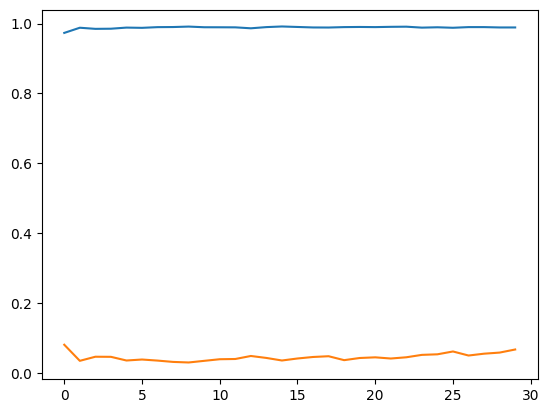

In [ ]:
plt.plot(test_accuracy_history)
plt.plot(test_loss_history)

 🎯 **Задание**:
 <p>
 Попробуйте поменять некоторые слои вашей нейронной сети:
<p>
1 - слои активации torch.nn.Sigmoid() на torch.nn.Tanh() или torch.nn.ReLU()
<p>
2 - слои пуллинга torch.nn.AvgPool2d на torch.nn.MaxPool2d
<p>
3 - в сверточном слое изменить количество каналов in_channels / out_channels
<p>
4 - в сверточном слое изменить размер ядра kernel_size
<p>
5 - добавьте дополнительные слои
# <p>

В итоге спроектируйте две нейронные сети с измененной архитектурой, оцените их качество и поясните результат.
 <p>Зафиксируйте результаты.

